In [1]:
# importing required libraries

import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import tree
import warnings
warnings.simplefilter("ignore")


In [2]:
# importing the dataset
result_df = pd.read_csv("./data/results.csv")
stats_df = pd.read_csv("./data/status.csv")
drivers_df = pd.read_csv("./data/drivers.csv")
races_df = pd.read_csv("./data/races.csv")
constructor_df = pd.read_csv("./data/constructors.csv")
driver_standings_df = pd.read_csv("./data/driver_standings.csv")
pd.get_option("display.max_columns", None)


20

In [3]:
# Viewing the data
result_df.head() 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
# merging all seperate dataframe into single dataframe as df
con1 = pd.merge(result_df, races_df, on='raceId')
con2 = pd.merge(con1, drivers_df, on='driverId')
con3 = pd.merge(con2, driver_standings_df, on=['driverId', 'raceId'])
con4 = pd.merge(con3, constructor_df, on='constructorId')
df = pd.merge(con4, stats_df, on=['statusId'])
pd.get_option("display.max_columns", None)

# dropping the columns that don't have any value
df.dropna

# checking the data types
df.head()


,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,driverStandingsId,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,27,19,1,1,22,9,5,5,5,4.0,...,9,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,69,21,1,1,22,5,3,3,3,6.0,...,48,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,90,22,1,1,22,3,2,2,2,8.0,...,69,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,109,23,1,1,22,3,1,1,1,10.0,...,91,38.0,1,1,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [5]:
# zero tables were dropped, there are no null values in this dataframe

# checking what types of data are in the dataframe and how much ram they take up
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24918 entries, 0 to 24917
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           24918 non-null  int64  
 1   raceId             24918 non-null  int64  
 2   driverId           24918 non-null  int64  
 3   constructorId      24918 non-null  int64  
 4   number_x           24918 non-null  object 
 5   grid               24918 non-null  int64  
 6   position_x         24918 non-null  object 
 7   positionText_x     24918 non-null  object 
 8   positionOrder      24918 non-null  int64  
 9   points_x           24918 non-null  float64
 10  laps               24918 non-null  int64  
 11  time_x             24918 non-null  object 
 12  milliseconds       24918 non-null  object 
 13  fastestLap         24918 non-null  object 
 14  rank               24918 non-null  object 
 15  fastestLapTime     24918 non-null  object 
 16  fastestLapSpeed    249

In [6]:
# viewing the columns in the dataframe
df.columns


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name_x',
       'date', 'time_y', 'url_x', 'driverRef', 'number_y', 'code', 'forename',
       'surname', 'dob', 'nationality_x', 'url_y', 'driverStandingsId',
       'points_y', 'position_y', 'positionText_y', 'wins', 'constructorRef',
       'name_y', 'nationality_y', 'url', 'status'],
      dtype='object')

In [7]:
# dropping unnecessary columns
df = df.drop(['url', 'url_x', 'position_x', 'fastestLapTime', 'positionText_x', 'time_x', 'time_y', 'driverRef', 'constructorRef', 'nationality_y', 'url_y',
             'positionText_y', 'points_y', 'rank', 'number_y', 'milliseconds', 'fastestLapSpeed', 'fastestLapSpeed', 'number_x', 'code', 'fastestLap', 'driverStandingsId'], axis='columns')


In [8]:
# renaming the column names to less confusing names

col_name = {'name_x': 'grand_prix', 'nationality_x': 'nationality', 'name_y': 'constructor',
            'raceId_x': 'racerId', 'points_x': 'points', 'position_y': 'position', 'forename': 'firstname'}

df.rename(columns=col_name, inplace=True)
df.head()


,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,...,grand_prix,date,firstname,surname,dob,nationality,position,wins,constructor,status
0,1,18,1,1,1,1,10.0,58,1,2008,...,Australian Grand Prix,2008-03-16,Lewis,Hamilton,1985-01-07,British,1,1,McLaren,Finished
1,27,19,1,1,9,5,4.0,56,1,2008,...,Malaysian Grand Prix,2008-03-23,Lewis,Hamilton,1985-01-07,British,1,1,McLaren,Finished
2,69,21,1,1,5,3,6.0,66,1,2008,...,Spanish Grand Prix,2008-04-27,Lewis,Hamilton,1985-01-07,British,2,1,McLaren,Finished
3,90,22,1,1,3,2,8.0,58,1,2008,...,Turkish Grand Prix,2008-05-11,Lewis,Hamilton,1985-01-07,British,3,1,McLaren,Finished
4,109,23,1,1,3,1,10.0,76,1,2008,...,Monaco Grand Prix,2008-05-25,Lewis,Hamilton,1985-01-07,British,1,2,McLaren,Finished


In [9]:
# combining the two columns into one column for better readability

df['driver_name'] = df['firstname']+' '+df['surname']

# dropping the now unnecessary columns
df = df.drop(['firstname', 'surname'], 1)


In [10]:
# converting to date format from string

pd.to_datetime(df.date)


0       2008-03-16
1       2008-03-23
2       2008-04-27
3       2008-05-11
4       2008-05-25
           ...    
24913   1953-05-30
24914   1953-05-30
24915   1962-10-07
24916   1954-07-17
24917   1951-05-30
Name: date, Length: 24918, dtype: datetime64[ns]

In [11]:
# putting columns into seperate dataframes

df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])


In [12]:
# importing a required library to work with todays date

from datetime import datetime


In [13]:
# calculating driver's age and creating it as a new column

dates = df['date']-df['dob']
age = dates.dt.days/365


# rounding the age to the nearest year (for better readability)

df['age'] = round(age)
pd.set_option('display.max_columns', None)
df.head()


,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId,grand_prix,date,dob,nationality,position,wins,constructor,status,driver_name,age
0,1,18,1,1,1,1,10.0,58,1,2008,1,1,Australian Grand Prix,2008-03-16,1985-01-07,British,1,1,McLaren,Finished,Lewis Hamilton,23.0
1,27,19,1,1,9,5,4.0,56,1,2008,2,2,Malaysian Grand Prix,2008-03-23,1985-01-07,British,1,1,McLaren,Finished,Lewis Hamilton,23.0
2,69,21,1,1,5,3,6.0,66,1,2008,4,4,Spanish Grand Prix,2008-04-27,1985-01-07,British,2,1,McLaren,Finished,Lewis Hamilton,23.0
3,90,22,1,1,3,2,8.0,58,1,2008,5,5,Turkish Grand Prix,2008-05-11,1985-01-07,British,3,1,McLaren,Finished,Lewis Hamilton,23.0
4,109,23,1,1,3,1,10.0,76,1,2008,6,6,Monaco Grand Prix,2008-05-25,1985-01-07,British,1,2,McLaren,Finished,Lewis Hamilton,23.0


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24918 entries, 0 to 24917
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       24918 non-null  int64         
 1   raceId         24918 non-null  int64         
 2   driverId       24918 non-null  int64         
 3   constructorId  24918 non-null  int64         
 4   grid           24918 non-null  int64         
 5   positionOrder  24918 non-null  int64         
 6   points         24918 non-null  float64       
 7   laps           24918 non-null  int64         
 8   statusId       24918 non-null  int64         
 9   year           24918 non-null  int64         
 10  round          24918 non-null  int64         
 11  circuitId      24918 non-null  int64         
 12  grand_prix     24918 non-null  object        
 13  date           24918 non-null  datetime64[ns]
 14  dob            24918 non-null  datetime64[ns]
 15  nationality    2491

In [15]:
# showing that the data processing lessens the ram usage (from 43 columns to 26 columns)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24918 entries, 0 to 24917
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       24918 non-null  int64         
 1   raceId         24918 non-null  int64         
 2   driverId       24918 non-null  int64         
 3   constructorId  24918 non-null  int64         
 4   grid           24918 non-null  int64         
 5   positionOrder  24918 non-null  int64         
 6   points         24918 non-null  float64       
 7   laps           24918 non-null  int64         
 8   statusId       24918 non-null  int64         
 9   year           24918 non-null  int64         
 10  round          24918 non-null  int64         
 11  circuitId      24918 non-null  int64         
 12  grand_prix     24918 non-null  object        
 13  date           24918 non-null  datetime64[ns]
 14  dob            24918 non-null  datetime64[ns]
 15  nationality    2491

In [16]:
# checking for null values

df.isnull().sum() / len(df) * 100


# since unused there are no null values in this dataframe there has to be no handling of null values but here is the code we used in an earlier build

# filling the missing values within columns with the mean value of that column or a 0 if it is a category column

# df[['rank', 'fastestLap']] = df[['rank', 'fastestLap']].fillna(0)
# df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(
#     df['timetaken_in_millisec'].mean())
# df['max_speed'] = df['max_speed'].fillna(df['max_speed'].mean())
# df['number'] = df['number'].fillna(0)

# # checking if null values are still present, if not, then the data is ready to be used (no null values present)

# df.isnull().sum() / len(df) * 100


resultId         0.0
raceId           0.0
driverId         0.0
constructorId    0.0
grid             0.0
positionOrder    0.0
points           0.0
laps             0.0
statusId         0.0
year             0.0
round            0.0
circuitId        0.0
grand_prix       0.0
date             0.0
dob              0.0
nationality      0.0
position         0.0
wins             0.0
constructor      0.0
status           0.0
driver_name      0.0
age              0.0
dtype: float64

In [17]:
# doing necessary imports to let the machine actually understand the data

le = LabelEncoder()

# creating a copy of the dataframe for future reference

df2 = pd.DataFrame.copy(df)


In [18]:
# # encoding the categorical columns

# le_grand_prix = LabelEncoder()
# le_nationality = LabelEncoder()
# le_constructor = LabelEncoder()
# le_status = LabelEncoder()
# le_driver_name = LabelEncoder()


In [19]:
# # labeling the categorical values

# df['grand_prix_n'] = le_grand_prix.fit_transform(df['grand_prix'])
# df['nationality_n'] = le_nationality.fit_transform(df['nationality'])
# df['constructor_n'] = le_constructor.fit_transform(df['constructor'])
# df['status_n'] = le_status.fit_transform(df['status'])
# df['driver_name_n'] = le_driver_name.fit_transform(df['driver_name'])


In [20]:
# dropping the categorical columns wich contain strings (and other useless columns)

# df = df.drop(['grand_prix', 'nationality', 'constructor',
#              'status', 'driver_name', 'dob', 'date', 'points'], 1)


In [21]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [22]:
# encoding categorical columns

for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

# dropping date and dob columns because they are not needed and they are not numerical

df.drop(['date', 'dob'], 1, inplace=True)

In [23]:
# defining the tree structure

model = tree.DecisionTreeClassifier(max_depth=5,random_state=1234)


In [24]:
# creating two seperate dataframes for the training and testing data

x = df.drop(['positionOrder'], 1)
y = df.positionOrder

In [25]:
# performing a train test split to see if the prediction will be accurate

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.35, random_state=40)


In [26]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [27]:
model.score(xtrain, ytrain)

0.34681402815510004

In [28]:
model.fit(xtest, ytest)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [29]:
model.score(xtest, ytest)

0.3066957119926622

In [30]:
fn = list(df.columns)
fn.remove('positionOrder')

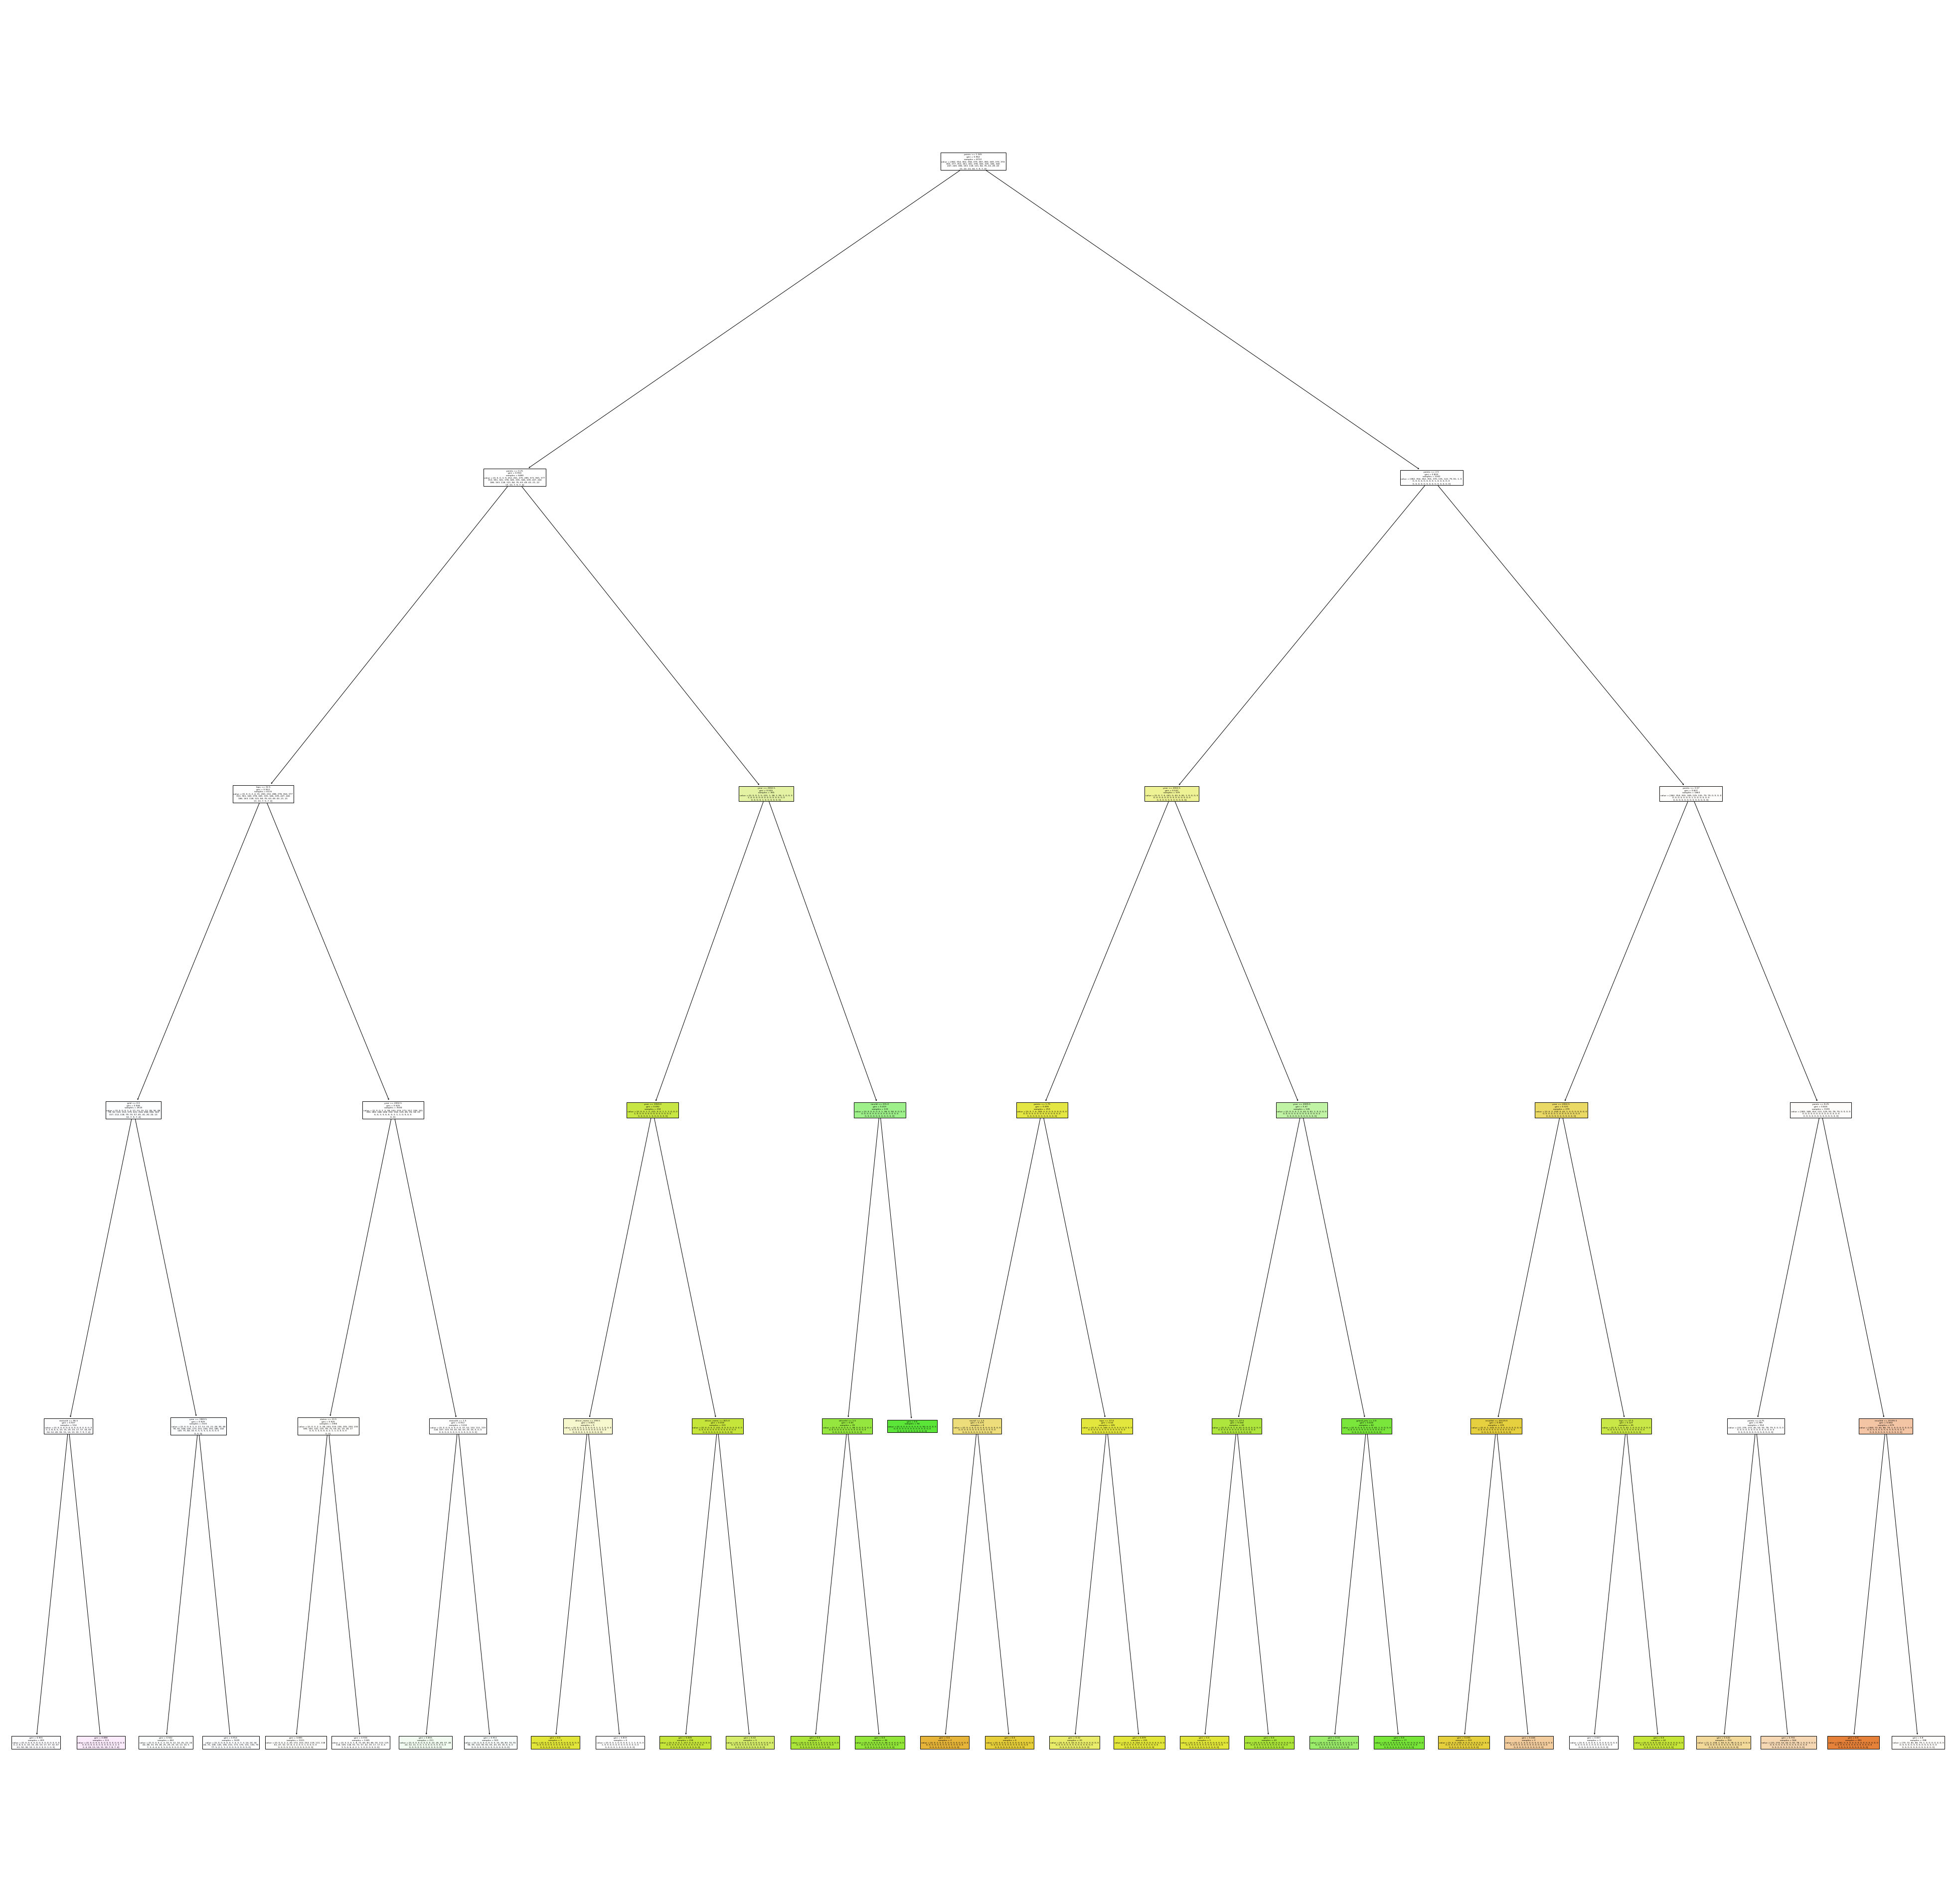

In [31]:
fig = plt.figure(figsize=(70,70))
_ = tree.plot_tree(model,
               feature_names=fn,
               filled=True)

IndexError: list index out of range

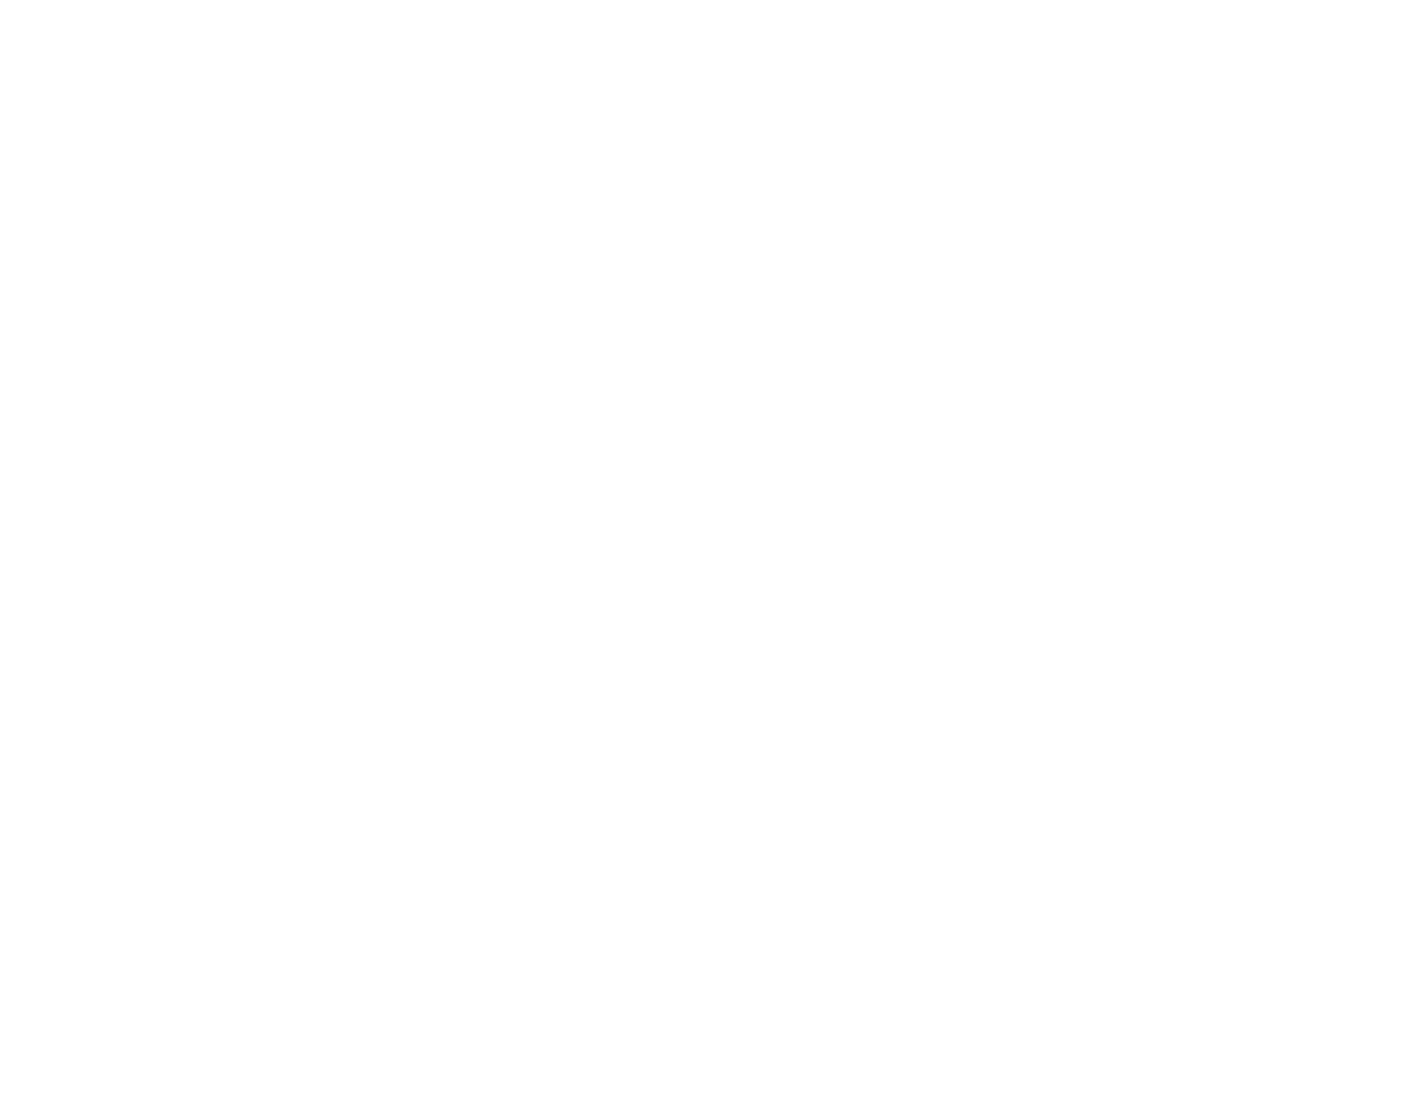

In [32]:
# Prepare the data data
iris = datasets.load_iris()
x = iris.data
y = iris.target

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
# # removing rows where the driver does not finish the grand prix

# df_fin = df[df['status'] == 'Finished']

# # showing the end of the dataframe to see if the data is correctly processed

# df_fin.tail(n=10)


In [ ]:
# # gathering the mean values of the numerical columns to variables

# meanMS = df.max_speed.mean()
# meanFL = df.fastestLap.mean()

# # using values above meanMS in the dataframe to rule out outliers

# df = df_fin[df_fin['max_speed'] > meanMS]
# df.head()


In [ ]:
# # using values above meanFL in the dataframe to rule out outliers

# df[df['fastestLap'] > meanFL]


In [ ]:
# # Returns unique values based on a hash table.

# df.year.unique()


In [ ]:
# # filtering the data by mean of driver's age and events after year 2012

# df = df[(df['age'] < df['age'].mean()) & (df['year'] > 2012)]
# df


In [ ]:
# # droping unwanted columns these columns are not needed for the analysis

# df.drop('date', 1, inplace=True)
# df.drop('dob', 1, inplace=True)
# df.drop('statusId', 1, inplace=True)


In [ ]:
# # Return unbiased skew of the dataframe

# df.skew()

# # skew is used to determine if the data is normally distributed or not


In [ ]:
# # as can be seen from the above output, the data is not normally distributed, the data will be transformed to normal distribution in the next step

# # Q1 and Q3 are the first and third quartiles of the data

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)

# # IQR is the interquartile range so it is the difference between the Q3 and Q1

# IQR = Q3 - Q1

# # outliers are the data points that are more than 1.5 times IQR away from the Q1 and Q3 so we will remove them

# df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
# df.head()


In [ ]:
# # the data is now normally distributed and can be used for analysis

# # removing junk data from the dataframe to make the figures more meaningful

# num.remove('date')
# num.remove('dob')
# num.remove('statusId')

# # creating figures to show the distribution of the data from the columns of the dataframe

# plt.figure(figsize=(15, 50))
# for i, j in zip(num, range(1, len(num)+1)):
#     plt.subplot(11, 2, j)
#     sns.kdeplot(df[i], shade=True, color='darkred')
# plt.show()


In [ ]:
# # importing a library to do preprocessing with

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()


In [ ]:
# # encoding categorical columns for faster processing in knn algorithm

# for i in cat:
#     df[i] = le.fit_transform(df[i])
# df.head()


In [ ]:
# # creating two seperate dataframes for the training and testing data

# x = df.drop('driver_name', 1)
# y = df.driver_name


In [ ]:
# # importing a library to split the data into training and testing data

# from sklearn.model_selection import train_test_split
# xtrain, xtest, ytrain, ytest = train_test_split(
#     x, y, test_size=0.3, random_state=40)


In [ ]:
# df.info()
